## Importing libraries

In [1]:
import pandas as pd
import sqlalchemy as db
import matplotlib.pyplot as plt
%matplotlib inline

### Importing data from shared database

In [2]:
engine = db.create_engine('sqlite:///airbnb.db')
connection = engine.connect()

In [3]:
Cal_df= pd.read_sql_table('Calendar',engine)
list_df= pd.read_sql_table('Listings',engine)
host_df= pd.read_sql_table('Hosts',engine)
Review_df= pd.read_sql_table('Reviews',engine)

# Data Understanding and feature creation

## Calendar table

In [4]:
Cal_df

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03,False,56.0,56.0,3,5
1,2,22742449,2022-11-13,True,95.0,95.0,2,99
2,3,34621717,2022-04-17,False,75.0,75.0,2,1125
3,4,38281744,2022-01-31,True,150.0,150.0,1,1000
4,5,18835003,2022-05-21,False,100.0,100.0,2,1125
...,...,...,...,...,...,...,...,...
319187,319188,52729945,2022-07-06,True,64.0,64.0,1,10
319188,319189,36953202,2022-07-08,False,140.0,140.0,3,1125
319189,319190,39580214,2022-06-13,True,49.0,49.0,1,13
319190,319191,49016014,2022-10-26,False,60.0,60.0,2,30


In [5]:
Cal_df.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03,False,56.0,56.0,3,5
1,2,22742449,2022-11-13,True,95.0,95.0,2,99
2,3,34621717,2022-04-17,False,75.0,75.0,2,1125
3,4,38281744,2022-01-31,True,150.0,150.0,1,1000
4,5,18835003,2022-05-21,False,100.0,100.0,2,1125


<AxesSubplot:>

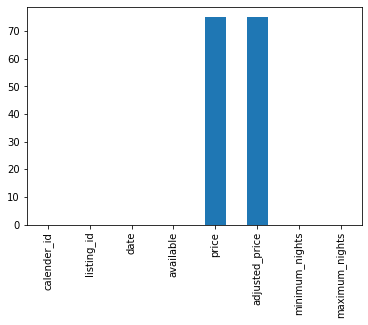

In [6]:
Cal_df.isna().sum().plot(kind = 'bar')

In [7]:
Cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   calender_id     319192 non-null  int64         
 1   listing_id      319192 non-null  int64         
 2   date            319192 non-null  datetime64[ns]
 3   available       319192 non-null  bool          
 4   price           319117 non-null  float64       
 5   adjusted_price  319117 non-null  float64       
 6   minimum_nights  319192 non-null  int64         
 7   maximum_nights  319192 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4)
memory usage: 17.4 MB


In [8]:
Cal_df['listing_id'].nunique()

1749

### Analysis

###### We only have 1749 unique values in the calendar table. However, there is a possiblity that a single listing can have modificiations in the price column multiple times. To avoid overfitting of the model, we can modify the price data by taking the mean value to ensure that we single value mapping to an individual listing id.

In [9]:
Cal_df.groupby('listing_id').mean().round(2)

,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,
50904,167467.31,0.73,165.33,160.24,1.0,60.0
116134,160630.43,0.81,150.00,150.00,2.0,1125.0
218916,168487.05,0.00,85.00,85.00,1.0,50.0
224333,162076.88,0.93,16.00,16.00,14.0,365.0
224682,154916.49,0.85,87.27,87.27,2.0,30.0
...,...,...,...,...,...,...
53916524,162814.81,0.94,88.00,88.00,3.0,365.0
53928545,145458.25,1.00,49.00,49.00,20.0,1125.0
53929354,165054.62,0.99,90.00,90.00,1.0,365.0


#### Since the data updated at the begining of index may not be relevant at the end of table, we can consider mean for the last 3 months for feasibility.

In [10]:
cal_df_latest = Cal_df.sort_values ('date').groupby('listing_id').tail(3)

In [11]:
cal_df_latest.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
277844,277845,33414044,2022-12-05,True,116.0,116.0,2,1125
21839,21840,33192413,2022-12-06,False,34.0,34.0,1,1125
312912,312913,33192413,2022-12-07,False,34.0,34.0,1,1125
217570,217571,33414044,2022-12-07,True,116.0,116.0,2,1125
171392,171393,33716554,2022-12-08,False,75.0,75.0,2,1125


In [12]:
cal_df_latest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5247 entries, 277844 to 314793
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   calender_id     5247 non-null   int64         
 1   listing_id      5247 non-null   int64         
 2   date            5247 non-null   datetime64[ns]
 3   available       5247 non-null   bool          
 4   price           5244 non-null   float64       
 5   adjusted_price  5244 non-null   float64       
 6   minimum_nights  5247 non-null   int64         
 7   maximum_nights  5247 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4)
memory usage: 333.1 KB


In [13]:
cal_df_latest.isna().sum()

calender_id       0
listing_id        0
date              0
available         0
price             3
adjusted_price    3
minimum_nights    0
maximum_nights    0
dtype: int64

In [14]:
cal_df_latest[cal_df_latest['price'].isna()]

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
127948,127949,45416364,2022-12-20,False,NaN,NaN,30,1125
164594,164595,45416364,2022-12-21,False,NaN,NaN,30,1125
257968,257969,45416364,2022-12-24,False,NaN,NaN,30,1125


In [15]:
cal_df_latest = cal_df_latest.dropna()
cal_df_latest

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
277844,277845,33414044,2022-12-05,True,116.0,116.0,2,1125
21839,21840,33192413,2022-12-06,False,34.0,34.0,1,1125
312912,312913,33192413,2022-12-07,False,34.0,34.0,1,1125
217570,217571,33414044,2022-12-07,True,116.0,116.0,2,1125
171392,171393,33716554,2022-12-08,False,75.0,75.0,2,1125
...,...,...,...,...,...,...,...,...
196873,196874,38547626,2022-12-25,False,68.0,68.0,2,1125
115452,115453,12746696,2022-12-25,False,96.0,96.0,2,1125
253381,253382,51123661,2022-12-25,True,175.0,175.0,1,365
253370,253371,40628338,2022-12-25,False,80.0,80.0,1,1125


In [16]:
cal_df_latest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5244 entries, 277844 to 314793
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   calender_id     5244 non-null   int64         
 1   listing_id      5244 non-null   int64         
 2   date            5244 non-null   datetime64[ns]
 3   available       5244 non-null   bool          
 4   price           5244 non-null   float64       
 5   adjusted_price  5244 non-null   float64       
 6   minimum_nights  5244 non-null   int64         
 7   maximum_nights  5244 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4)
memory usage: 332.9 KB


In [17]:
cal_df_sorted = cal_df_latest.groupby('listing_id').mean().round(2)

In [18]:
cal_df_sorted.reset_index(level = 0 , inplace = True)

In [19]:
cal_df_sorted

,listing_id,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights
0,50904,166029.33,0.0,166.67,158.67,1.0,60.0
1,116134,173487.67,1.0,150.00,150.00,2.0,1125.0
2,218916,163471.33,0.0,85.00,85.00,1.0,50.0
3,224333,193003.33,1.0,16.00,16.00,14.0,365.0
4,224682,111238.33,1.0,85.00,85.00,2.0,30.0
...,...,...,...,...,...,...,...
1743,53916524,65968.00,1.0,88.00,88.00,3.0,365.0
1744,53928545,120818.67,1.0,49.00,49.00,20.0,1125.0
1745,53929354,163447.67,1.0,90.00,90.00,1.0,365.0
1746,53949105,191385.00,1.0,990.00,990.00,2.0,1125.0


In [20]:
cal_df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1748 non-null   int64  
 1   calender_id     1748 non-null   float64
 2   available       1748 non-null   float64
 3   price           1748 non-null   float64
 4   adjusted_price  1748 non-null   float64
 5   minimum_nights  1748 non-null   float64
 6   maximum_nights  1748 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 95.7 KB


######  Final data has 1748 unique listing ids, as we have dropped the rows with blank price column

## Listings table

In [21]:
list_df.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


<AxesSubplot:>

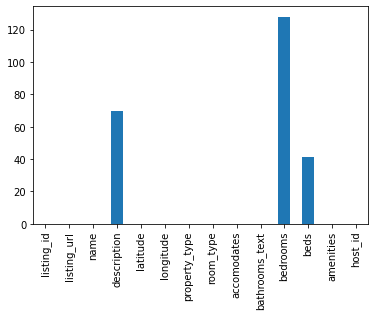

In [22]:
list_df.isna().sum().plot(kind = 'bar')

In [23]:
list_df.shape

(1749, 14)

In [24]:
list_df['listing_id'].nunique()

1749

######  We have similar count of rows in the calender table and can be joined easily

## Hosts table

In [25]:
host_df.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27,"Antwerp, Flanders, Belgium",None
3,452791,Tatiana,2011-03-20,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [26]:
host_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_id        1111 non-null   int64         
 1   host_name      1111 non-null   object        
 2   host_since     1111 non-null   datetime64[ns]
 3   host_location  1108 non-null   object        
 4   host_about     490 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 43.5+ KB


<AxesSubplot:>

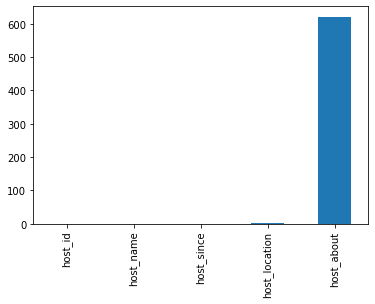

In [27]:
host_df.isna().sum().plot(kind = 'bar')

In [28]:
host_df['host_id'].nunique()

1111

###### No duplicate data in host_id, so we can join the remaining tables easily

## Reviews table

In [29]:
Review_df.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03,7984251,Marcel,This is a very nice appartement. We really lik...


In [30]:
Review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62987 entries, 0 to 62986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   review_id      62987 non-null  int64         
 1   listing_id     62987 non-null  int64         
 2   date           62987 non-null  datetime64[ns]
 3   reviewer_id    62987 non-null  int64         
 4   reviewer_name  62987 non-null  object        
 5   comments       62923 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 2.9+ MB


<AxesSubplot:>

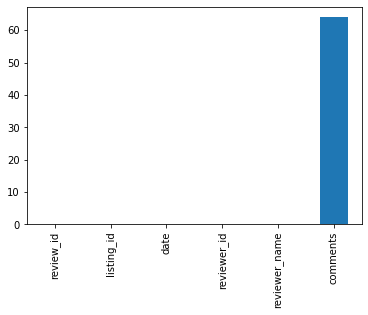

In [31]:
Review_df.isna().sum().plot(kind = 'bar')

In [32]:
Review_df.groupby('listing_id').count()['reviewer_id']

listing_id
50904         2
116134      120
218916       28
224333        3
224682      349
           ... 
53522234      2
53538847      1
53600839      1
53819793      1
53825194      2
Name: reviewer_id, Length: 1525, dtype: int64

###### multiple reviews have been tagged to individual listing id which is common. We will have to average the data to help us training the model

In [33]:
Review_df.groupby('listing_id').count()['reviewer_id'].describe().round(2)

count    1525.00
mean       41.30
std        64.77
min         1.00
25%         5.00
50%        17.00
75%        47.00
max       648.00
Name: reviewer_id, dtype: float64

In [34]:
Review_df_group = Review_df.groupby('listing_id').count()['reviewer_id'].to_dict()

In [35]:
Review_df['count_of_reviews'] = Review_df['listing_id'].map(Review_df_group)

In [36]:
Review_df

,review_id,listing_id,date,reviewer_id,reviewer_name,comments,count_of_reviews
0,1,50904,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...,2
1,2,50904,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help...",2
2,3,116134,2012-03-05,928644,Aurélien,"Amazing flat, really close from the MAS Musem,...",120
3,4,116134,2012-05-25,231288,Gail,"This is a well equipped, very comfortable apar...",120
4,5,116134,2013-09-03,7984251,Marcel,This is a very nice appartement. We really lik...,120
...,...,...,...,...,...,...,...
62982,62983,53538847,2021-12-05,48076753,Serge,The place as it's shown in the photos. Great l...,1
62983,62984,53600839,2021-12-12,6635741,Dániel,The spacious apartment is idyllically located ...,1
62984,62985,53819793,2021-12-21,247934155,Gijs,It was great,1
62985,62986,53825194,2021-12-19,361042882,Siarhei,Flor es muy atenta y me ayudo mucho entrando a...,2


In [37]:
total_reviews = Review_df.groupby('listing_id').count()[['review_id']]

In [38]:
total_reviews.reset_index(level = 0, inplace = True)

In [39]:
total_reviews.columns =['listing_id','total_reviews']

In [40]:
total_reviews.sort_values('total_reviews',ascending = False)

,listing_id,total_reviews
64,4502646,648
136,8766126,564
35,1901179,463
131,8587634,447
538,28693154,394
...,...,...
1407,51967682,1
1023,43136840,1
1028,43341118,1
1034,43584824,1


In [41]:
total_reviews.head()

,listing_id,total_reviews
0,50904,2
1,116134,120
2,218916,28
3,224333,3
4,224682,349


#### Now that we have all the tables ready, we can join them together as a single data frame and continue with the next steps

## Joining tables

In [42]:
df_cal_list = pd.merge(cal_df_sorted,list_df, on = 'listing_id', how = 'inner' )

In [43]:
df_cal_list.shape

(1748, 20)

In [44]:
df_cal_list_host = pd.merge(df_cal_list,host_df, on = 'host_id', how = 'inner' )

In [45]:
df_cal_list_host.shape

(1748, 24)

In [46]:
df_airbnb = pd.merge(df_cal_list_host,total_reviews, on = 'listing_id', how = 'left' )

In [47]:
df_airbnb.shape

(1748, 25)

In [48]:
df_airbnb.head()

,listing_id,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,description,...,bathrooms_text,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,host_about,total_reviews
0,50904,166029.33,0.0,166.67,158.67,1.00,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,...,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0
1,891884,30099.00,0.0,175.00,175.00,1.67,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,This second floor suite with a splendid square...,...,1 private bath,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0
2,891907,202081.33,1.0,215.00,215.00,3.00,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,"While entering this well located flat, you'll ...",...,1.5 baths,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,6.0
3,2543695,114260.67,1.0,200.00,200.00,2.00,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,"While entering this well located flat, you'll ...",...,1.5 baths,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,15.0
4,116134,173487.67,1.0,150.00,150.00,2.00,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,...,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,Paul,2011-05-14,"Kapellen, Flanders, Belgium",My wife Gina and I will be glad to welcome you...,120.0


<AxesSubplot:>

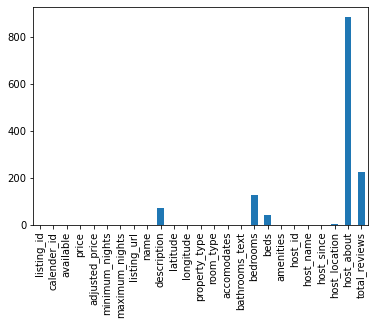

In [49]:
df_airbnb.isna().sum().plot(kind='bar')

In [50]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748 entries, 0 to 1747
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   listing_id      1748 non-null   int64         
 1   calender_id     1748 non-null   float64       
 2   available       1748 non-null   float64       
 3   price           1748 non-null   float64       
 4   adjusted_price  1748 non-null   float64       
 5   minimum_nights  1748 non-null   float64       
 6   maximum_nights  1748 non-null   float64       
 7   listing_url     1748 non-null   object        
 8   name            1748 non-null   object        
 9   description     1678 non-null   object        
 10  latitude        1748 non-null   float64       
 11  longitude       1748 non-null   float64       
 12  property_type   1748 non-null   object        
 13  room_type       1748 non-null   object        
 14  accomodates     1748 non-null   int64         
 15  bath

In [51]:
df_airbnb.to_csv("airbnb.csv",index = False)

### Final data is now ready for quality checks and feature enginnering, and we will continue the same in the next notebook